In [453]:
# Esenciales
import pandas as pd  # Manipulación de datos en estructuras tipo DataFrame
import numpy as np  # Cálculos numéricos y manejo de matrices

# Barra de progreso
from tqdm.notebook import tqdm  # Progreso en entornos de notebooks
from tqdm import trange  # Progreso en bucles
tqdm.pandas()  # Integración con pandas para mostrar el progreso

# Visualización de datos
import matplotlib.pyplot as plt  # Gráficos en 2D
import seaborn as sns  # Gráficos estadísticos más estilizados
from mpl_toolkits.mplot3d import Axes3D  # Soporte para gráficos en 3D
sns.set_theme(style="ticks")  # Configuración del estilo de gráficos

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split  # División de datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Normalización de datos
from sklearn.preprocessing import FunctionTransformer  # Aplicación de transformaciones personalizadas
from sklearn.neighbors import LocalOutlierFactor  # Detección de valores atípicos

# Creación de pipelines
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union  
# Pipeline: Construcción de secuencias de transformación y modelos
# FeatureUnion y make_union: Combinación de múltiples transformaciones

from sklearn.compose import ColumnTransformer, make_column_transformer  # Transformaciones específicas por columna
from sklearn.base import BaseEstimator, TransformerMixin  # Creación de transformadores personalizados
from sklearn import set_config  
set_config(display="diagram")  # Visualización gráfica de los pipelines
set_config(transform_output="pandas")  # Salida de los transformadores en formato DataFrame de pandas

# Modelos de Machine Learning
from xgboost import XGBRegressor  # Modelo XGBoost para regresión
from sklearn.ensemble import GradientBoostingRegressor  # Regresión con Gradient Boosting
from lightgbm import LGBMRegressor  # Modelo LightGBM para regresión
from catboost import CatBoostRegressor  # Modelo CatBoost para regresión

# Métricas y evaluación de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
# mean_squared_error: Error cuadrático medio
# mean_absolute_error: Error absoluto medio
# r2_score: Coeficiente de determinación

# Ajuste de hiperparámetros
from sklearn.model_selection import cross_val_score, KFold  # Validación cruzada
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Búsqueda de hiperparámetros

# Ignorar advertencias de pandas
pd.options.mode.chained_assignment = None  # Evita advertencias al modificar subconjuntos de DataFrames


In [328]:
# Carga de datos
CERN = pd.read_csv('dielectron.csv')  
# Se lee el archivo CSV que contiene los datos de colisiones de electrones del CERN

# Copia de seguridad para proteger los datos originales
df = CERN.copy()  

# Vista previa de los primeros cinco registros del DataFrame
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [330]:
# Dimensiones del DataFrame (filas, columnas)
df.shape  

(100000, 19)

In [332]:
# Estructura del DataFrame (tipo de datos, valores no nulos, memoria utilizada)
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [334]:
# Resumen estadístico de las variables numéricas (transpuesta para mejor visualización)
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
Run,100000.0,1.479353e+05,9.203061e+02,146511.000000,1.471140e+05,1.479290e+05,1.490110e+05,1.491820e+05
Event,100000.0,4.957212e+08,4.037703e+08,6414.000000,2.023970e+08,3.902759e+08,6.338891e+08,1.791247e+09
E1,100000.0,3.643647e+01,4.121620e+01,0.377928,8.458595e+00,2.171700e+01,5.000335e+01,8.506020e+02
px1,100000.0,1.358968e-01,1.340498e+01,-250.587000,-5.233675e+00,1.413385e-01,5.714560e+00,1.345390e+02
py1,100000.0,1.822913e-01,1.347028e+01,-126.079000,-5.276248e+00,9.909205e-02,5.648087e+00,1.474670e+02
pz1,100000.0,-1.508037e+00,5.160365e+01,-840.987000,-1.585983e+01,-3.129870e-01,1.321265e+01,7.600960e+02
pt1,100000.0,1.441217e+01,1.238874e+01,0.219629,3.771172e+00,1.296780e+01,2.001892e+01,2.655780e+02
eta1,100000.0,-6.409547e-02,1.462137e+00,-4.165380,-1.283883e+00,-6.117850e-02,1.144408e+00,2.622970e+00
phi1,100000.0,2.161430e-02,1.799562e+00,-3.141580,-1.527030e+00,3.432395e-02,1.562355e+00,3.141420e+00
Q1,100000.0,-5.480000e-03,9.999900e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00


In [336]:
# Lista con los nombres de las columnas
df.columns  

Index(['Run', 'Event', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'],
      dtype='object')

In [338]:
# Corrección del nombre de la columna 'px1 ' eliminando el espacio extra
df.rename(columns={"px1 ": "px1"}, inplace=True)  

In [340]:
# Verificación de filas duplicadas en el DataFrame
df.duplicated().sum()  

23

In [341]:
# Conteo del número de veces que aparece cada evento
df["Event"].value_counts()  

Event
439950319    3
440012942    3
542369397    2
541746848    2
407103633    2
            ..
533929729    1
533477001    1
533722800    1
533379552    1
524172389    1
Name: count, Length: 99976, dtype: int64

In [344]:
# Obtención de los IDs de eventos que aparecen más de una vez
dup_ids = df["Event"].value_counts()[df["Event"].value_counts() > 1].index.tolist()  

# Filtrado y visualización de las filas correspondientes a eventos duplicados, ordenados por 'Event'
df[df["Event"].isin(dup_ids)].sort_values(by="Event")

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
97032,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
96984,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
97033,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96985,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96986,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97034,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97035,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
96987,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
97015,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660
96988,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660


Todos estos son eventos duplicados, con la excepción de 'Event'=418006834:

In [347]:
df[df["Event"] == 418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.27450,9.36951,-1.319410,0.910934,1,61.61360,23.14570,5.76582,-56.80910,23.8530,-1.602350,0.244141,1,10.66540
79612,148029,418006834,21.8398,-19.43140,-9.03848,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.842080,1,3.76546


In [349]:
# Corrección del ID de evento duplicado: se asigna un nuevo ID único a la segunda fila duplicada
df.loc[79612, "Event"] = 418006835  

# Ajuste de la lista de IDs duplicados: se elimina el ID corregido de la lista
dup_ids.remove(418006834)  

# Verificación de que la corrección fue exitosa
df[df["Event"] == 418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.2745,9.36951,-1.31941,0.910934,1,61.6136,23.1457,5.76582,-56.8091,23.853,-1.60235,0.244141,1,10.6654


In [351]:
# Eliminación de eventos duplicados manteniendo solo la primera ocurrencia
df = df.drop_duplicates(subset="Event")  

In [353]:
# Verificación de que no quedan filas duplicadas
df.duplicated().sum()  

0

In [355]:
# Comprobación de valores nulos en cada columna
df.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

Hay 85 filas con un valor nulo faltante (M). Dado que esto es solo una pequeña fracción de los datos (<0,001 %), podemos descartar estas filas sin problemas.

In [358]:
# Eliminación de filas con valores nulos en la columna 'M'
df = df.dropna(subset=["M"])  

# Verificación de que no queden valores nulos en el DataFrame
print("Número de valores nulos después de eliminar filas:", df.isnull().sum().sum())  

Número de valores nulos después de eliminar filas: 0


In [360]:
# Guardado del DataFrame limpio en un archivo CSV
df.to_csv("dielectron_limpio.csv", index=False)

# Explorando el Target

In [362]:
# Definición de la variable objetivo
target = "M"  

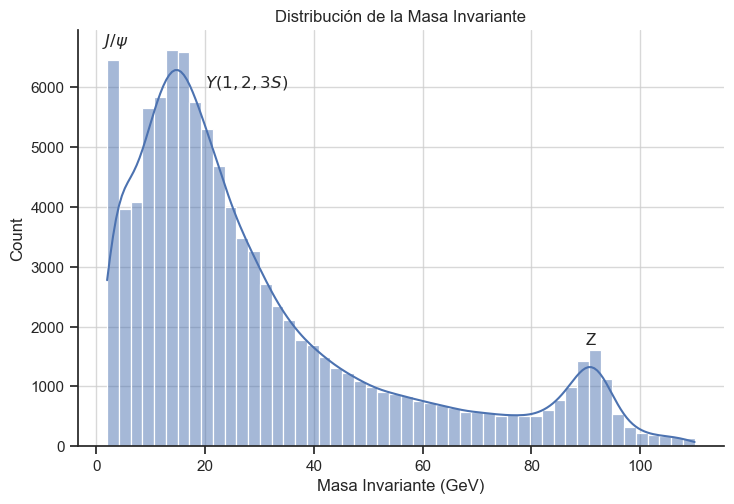

In [363]:
# Histograma de la variable objetivo con distribución de densidad (KDE)
sns.displot(df[target], bins=50, kde=True, aspect=1.5)  
plt.title("Distribución de la Masa Invariante")  

# Agregar líneas de la cuadrícula con transparencia
plt.grid(alpha=0.75)  

# Etiqueta del eje X
plt.xlabel("Masa Invariante (GeV)")  

# Anotaciones para identificar partículas específicas en la distribución
plt.annotate("Z", xy=(90, 1700))  # Bosón Z  
plt.annotate("$J/\\psi$", xy=(1, 6700))  # Mesón J/psi  
plt.annotate("$Y(1,2,3S)$", xy=(20, 6000))  # Mesón Upsilon  

# Mostrar la gráfica
plt.show()

Vemos tres picos en la masa invariante aproximadamente en 3 GeV, 10 GeV y 90 GeV.

Los picos en la masa invariante dentro de una distribución de productos de decaimiento (en nuestro caso, 
e
+
e 
+
  y 
e
−
e 
−
 ) suelen representar la masa de una partícula madre que decayó para producir esos productos.

Cuando una partícula inestable decae, los productos del decaimiento (en este caso, 
e
+
e 
+
  y
e
−
e 
−
 ) conservan la energía y el momento total. La masa invariante de estos productos se agrupa en valores cercanos a la masa de la partícula original, lo que da lugar a estos picos en la distribución.

Estos picos representan el mesón J/ψ, los mesones Υ y el bosón Z, respectivamente.

# Explorando las características

-Caracteristicas numericas

In [370]:
# Lista de caracteristicas numericas
numerical_features = [
    "E1",
    "px1",
    "py1",
    "pz1",
    "pt1",
    "eta1",
    "phi1",
    "E2",
    "px2",
    "py2",
    "pz2",
    "pt2",
    "eta2",
    "phi2",
]

In [372]:
# Resumen estadístico de las características numéricas
df[numerical_features].describe().T  

,count,mean,std,min,25%,50%,75%,max
E1,99892.0,36.459695,41.223335,0.377928,8.471438,21.740300,50.063975,850.60200
px1,99892.0,0.136384,13.408913,-250.587000,-5.236865,0.141563,5.719105,134.53900
py1,99892.0,0.183445,13.475059,-126.079000,-5.282197,0.100481,5.652223,147.46700
pz1,99892.0,-1.512384,51.623350,-840.987000,-15.899575,-0.313852,13.231550,760.09600
pt1,99892.0,14.417882,12.391571,0.219629,3.773227,12.972400,20.026275,265.57800
eta1,99892.0,-0.064220,1.462644,-4.165380,-1.284752,-0.061568,1.145393,2.62297
phi1,99892.0,0.021958,1.799509,-3.141580,-1.526615,0.035074,1.562642,3.14142
E2,99892.0,44.030701,46.763373,0.472500,11.069550,25.292400,66.984775,948.37500
px2,99892.0,-0.002902,13.130931,-233.730000,-4.793865,-0.035024,4.819960,227.33000
py2,99892.0,0.125600,13.172812,-145.651000,-4.605640,0.084412,5.063548,166.28300


  0%|          | 0/14 [00:00<?, ?it/s]

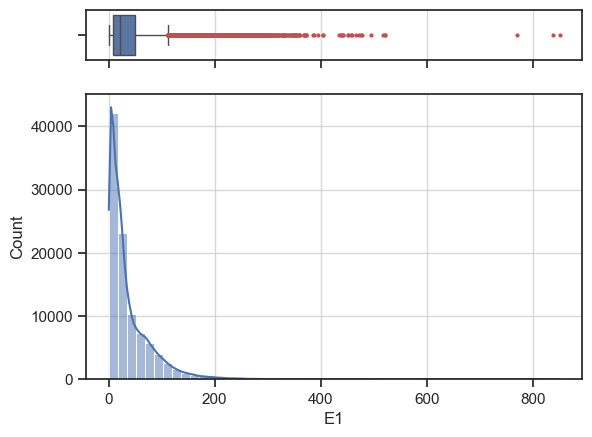

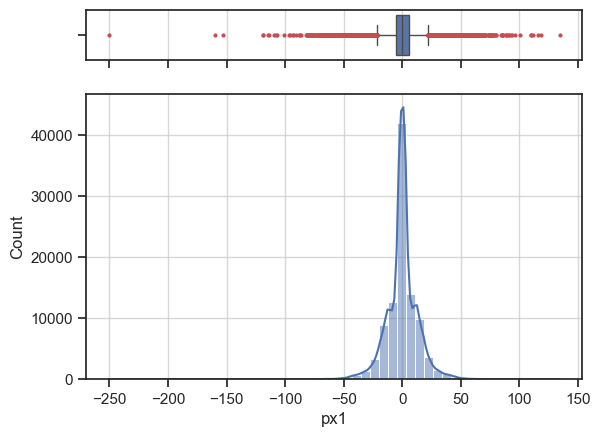

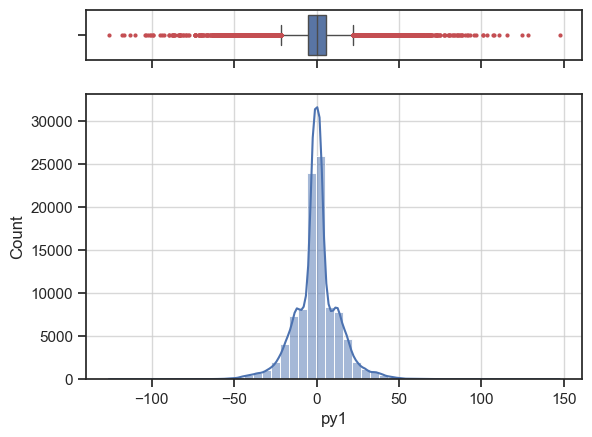

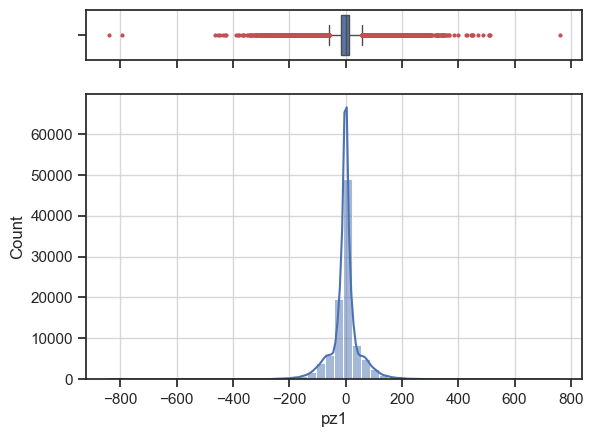

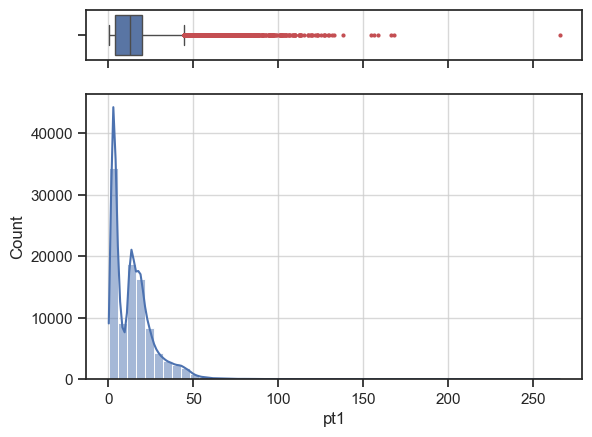

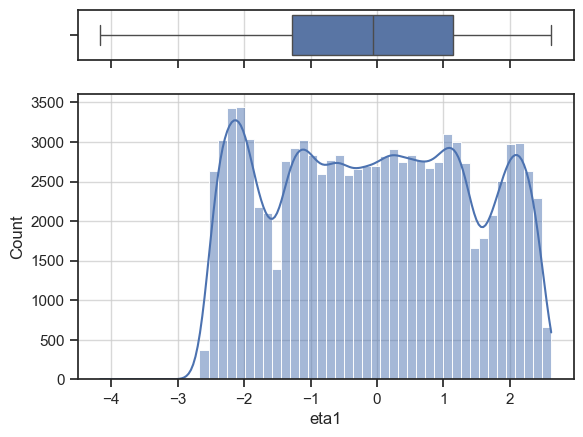

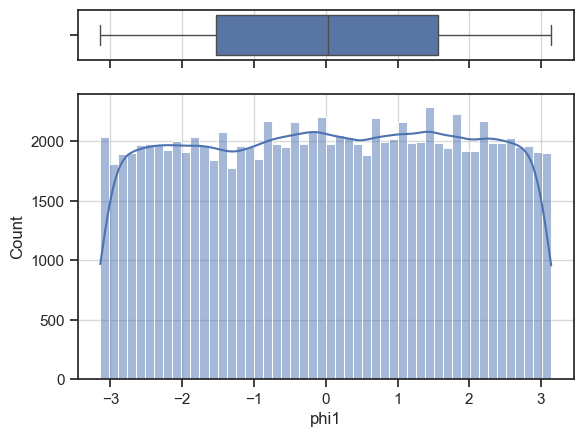

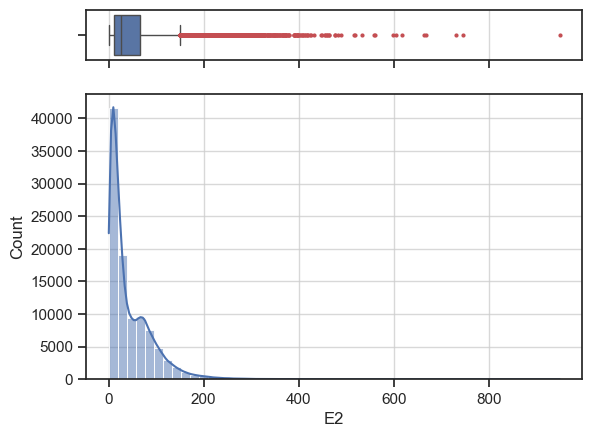

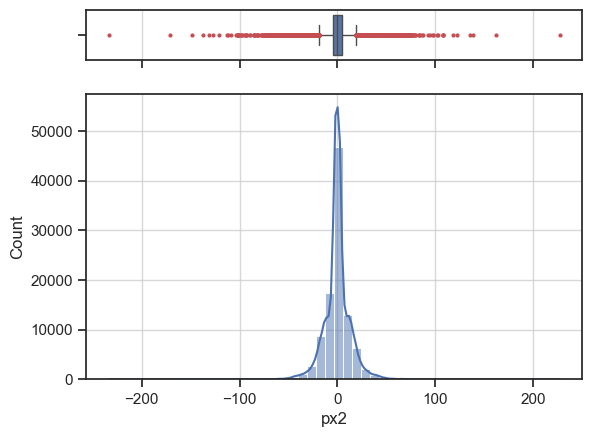

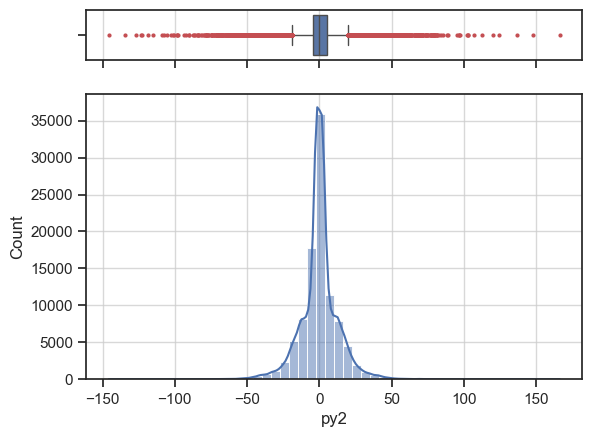

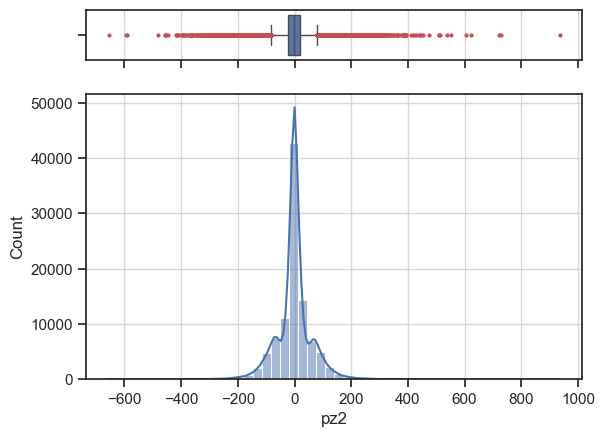

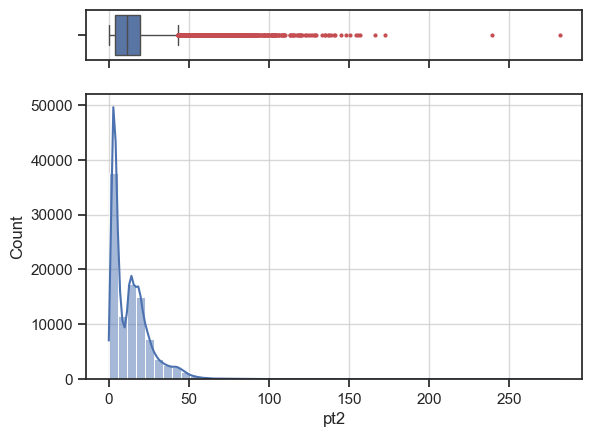

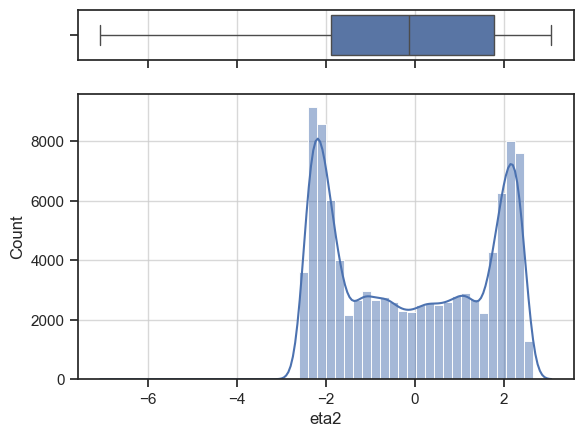

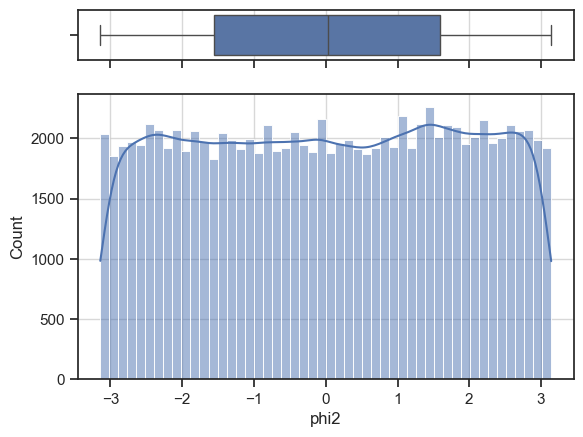

In [433]:
# Histograma / Boxplot de características numéricas
for f in tqdm(numerical_features):
    fig, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
    )

    # Líneas de la cuadrícula
    ax_box.grid(alpha=0.75)
    ax_hist.grid(alpha=0.75)
    
    # Personalización de las propiedades de los puntos atípicos (outliers)
    flierprops = dict(
        markerfacecolor="r", markersize=2, linestyle="none", markeredgecolor="r"
    )

    # Agregar un gráfico en cada parte
    sns.boxplot(df[f], orient="h", ax=ax_box, flierprops=flierprops)  # Boxplot
    sns.histplot(df[f], ax=ax_hist, bins=50, kde=True)  # Histograma con KDE

    # Eliminar el nombre del eje X para el boxplot
    ax_box.set(xlabel="")
    plt.show()

Resumen de los gráficos de características numéricas:

E1, E2: Ambos tienen una cola larga hacia la derecha, con algunos valores atípicos
px1, px2: Ambos tienen una distribución normal, con algunos valores atípicos
py1, py2: Ambos tienen una distribución normal, con algunos valores atípicos
pz1, pz2: Ambos tienen una distribución normal, con algunos valores atípicos
pt1, pt2: Ambos tienen dos picos, una cola hacia la derecha, con algunos valores atípicos
eta1, eta2: Ambos tienen picos en cada extremo, sin valores atípicos
phi1, phi2: Ambos tienen una distribución uniforme, sin valores atípicosoutliers

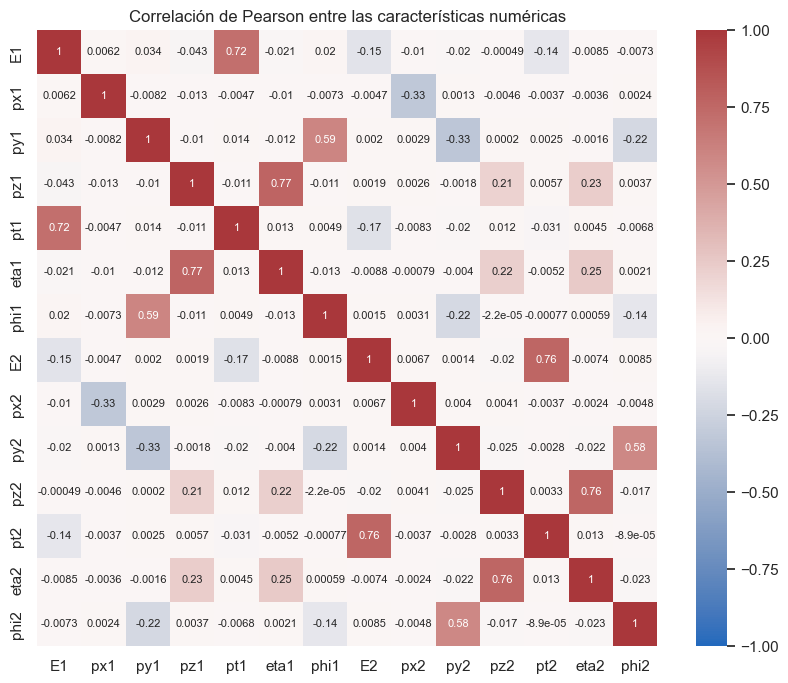

In [378]:
# Correlación de Pearson
corr_pearson = df[numerical_features].corr(method="pearson")  

# Graficando la matriz de correlación como un mapa de calor (heatmap)
fig = plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_pearson, annot=True, cmap="vlag", vmin=-1, vmax=1, annot_kws={"size": 8}
)  
plt.tick_params(axis="both", which="both", bottom=False, left=False)  # Eliminando las marcas en los ejes
plt.title("Correlación de Pearson entre las características numéricas")
plt.show()

Las características numéricas altamente correlacionadas son:

E1 y pt1
py1 y phi1
pz1 y eta1
E2 y pt2
py2 y phi2
pz2 y eta2

Investigaremos estas correlaciones más a fondo con diagramas de dispersión.

  0%|          | 0/6 [00:00<?, ?it/s]

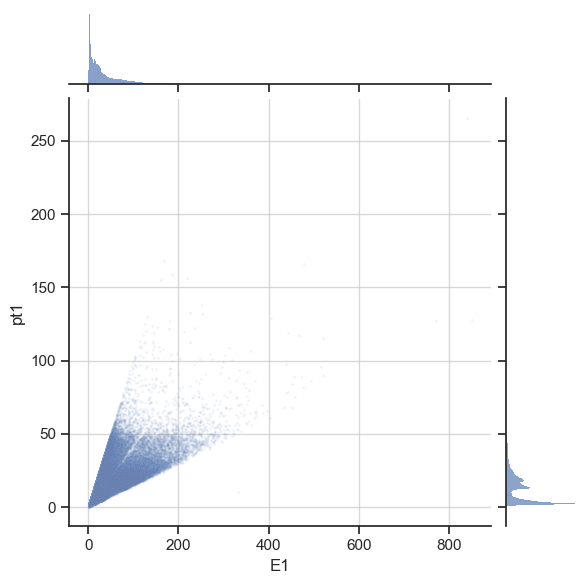

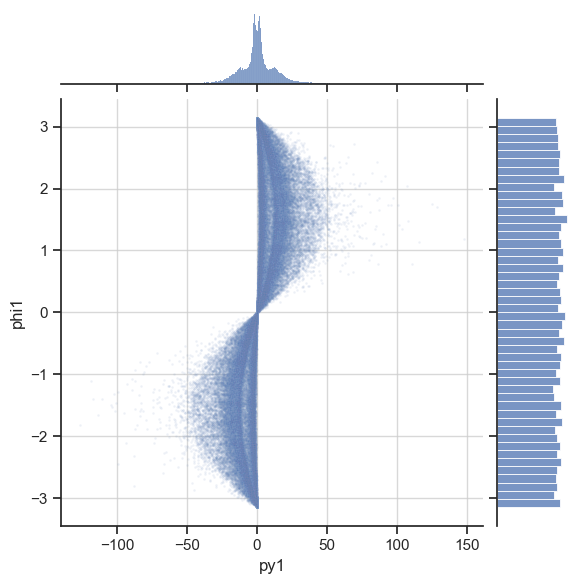

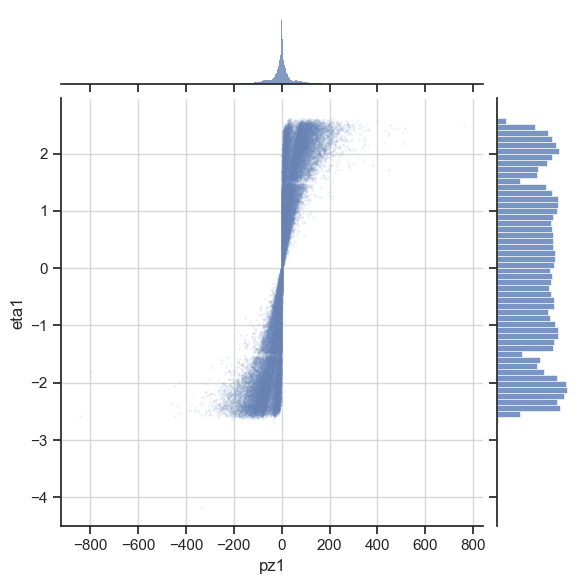

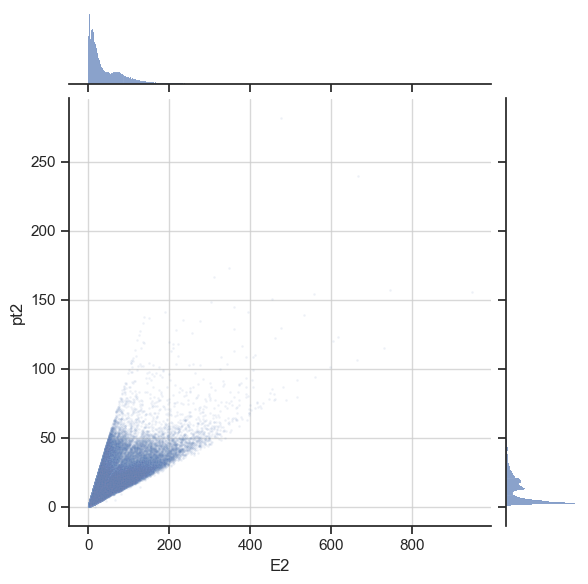

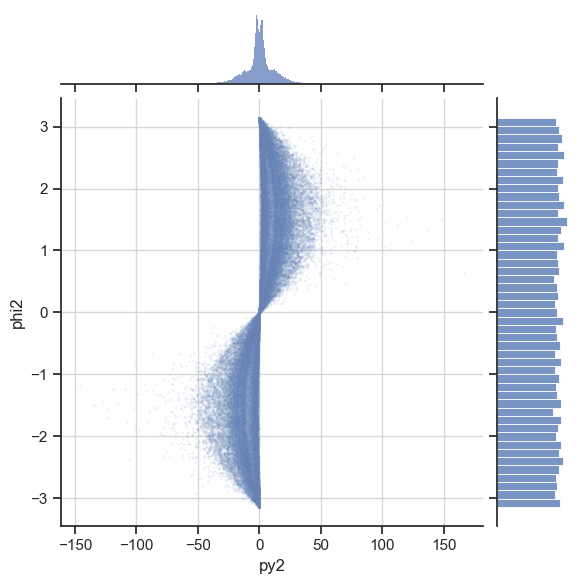

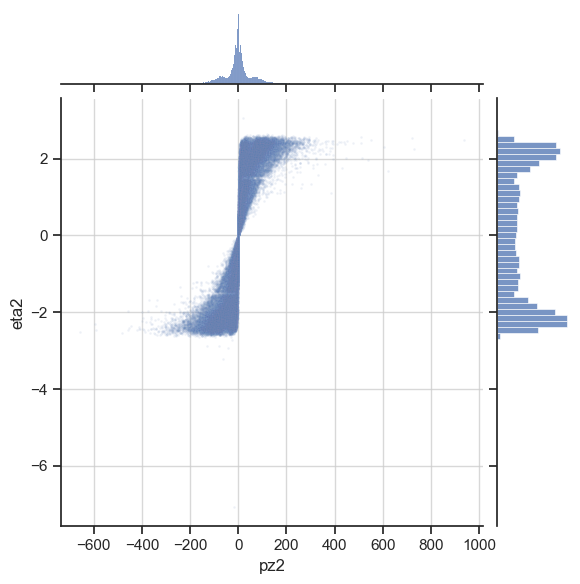

In [439]:
# Lista anidada de características altamente correlacionadas
alta_corr = [
    ["E1", "pt1"],
    ["py1", "phi1"],
    ["pz1", "eta1"],
    ["E2", "pt2"],
    ["py2", "phi2"],
    ["pz2", "eta2"],
]

# Diagramas de dispersión (scatter plots) de características altamente correlacionadas
for i in tqdm(alta_corr):
    sns.jointplot(x=i[0], y=i[1], data=df, s=3, alpha=0.1)  # Diagrama de dispersión
    corr = df[i[0]].corr(df[i[1]]).round(2)  # Correlación de Pearson
    plt.grid(alpha=0.75)  # Líneas de la cuadrícula
    plt.show()

-Caracteristicas categoricas

In [383]:
# Lista de características categóricas
categorical_features = ["Q1", "Q2"]

# Tabla de contingencia (crosstab) para las cargas de los electrones
pd.crosstab(df["Q1"], df["Q2"], normalize=True).round(2)

Q2,-1,1
Q1,,
-1,0.22,0.29
1,0.28,0.21


Podemos ver que las cargas están bien equilibradas, pero tenemos ligeramente más combinaciones de signos opuestos (e-e+) que combinaciones del mismo signo (e+e+ o e-e-).

# Target vs. Caracteristicas

-Caracteristicas numericas vs. Target

  0%|          | 0/14 [00:00<?, ?it/s]

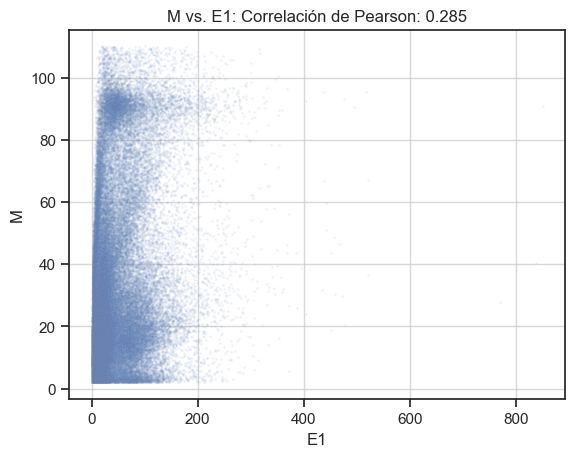

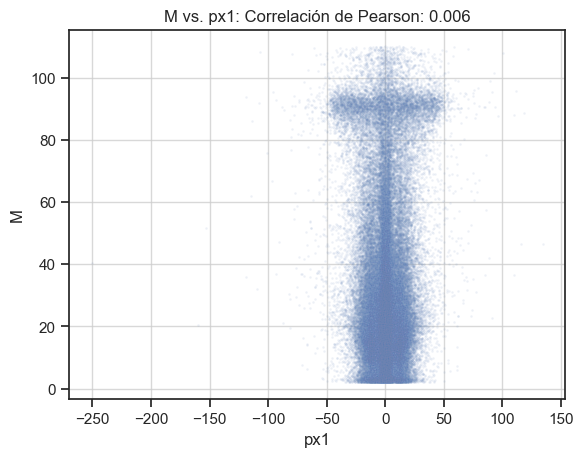

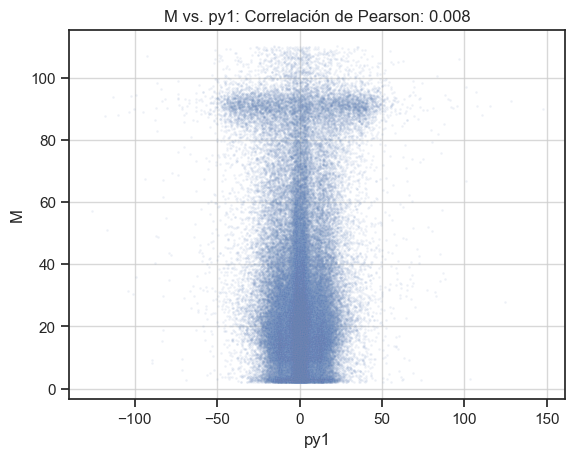

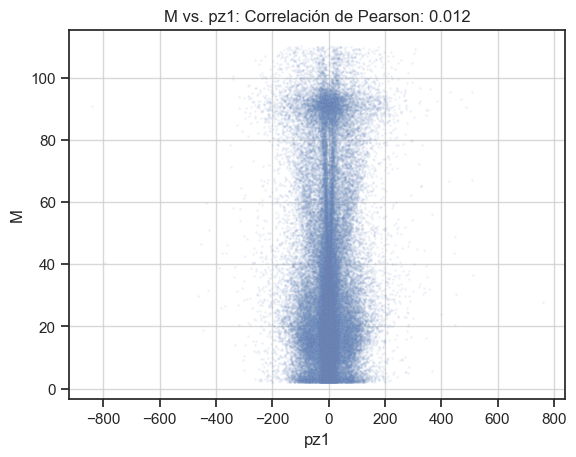

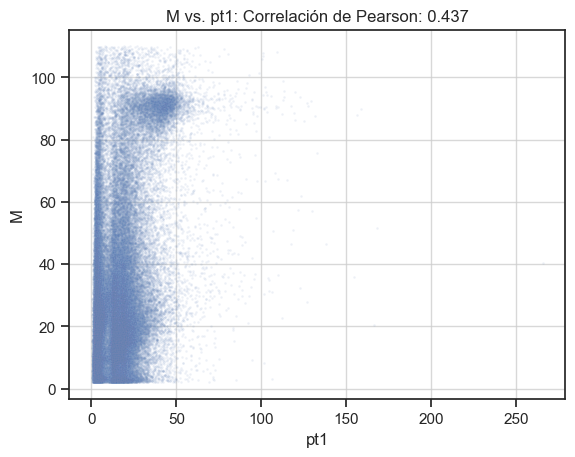

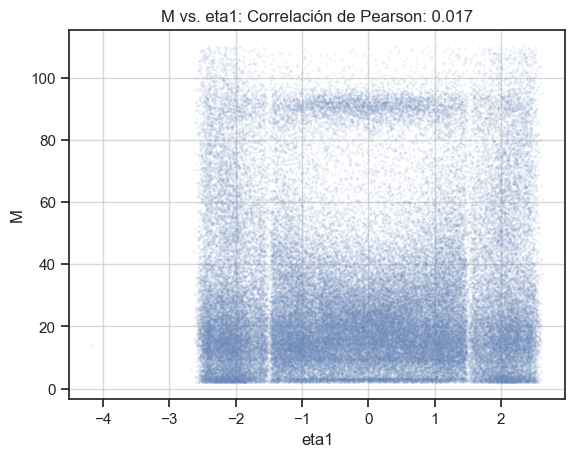

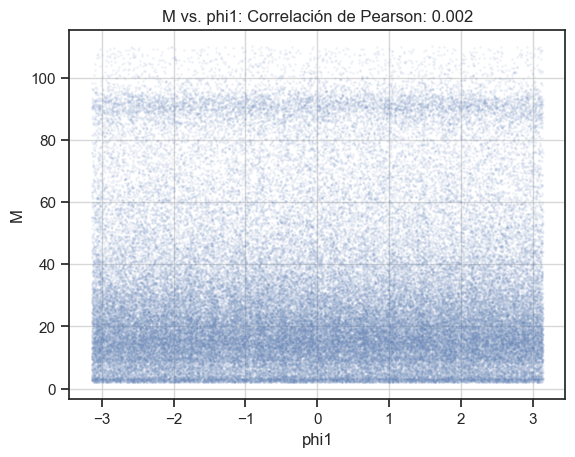

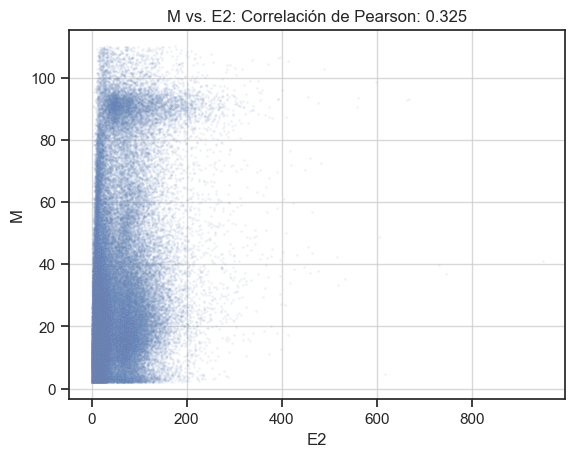

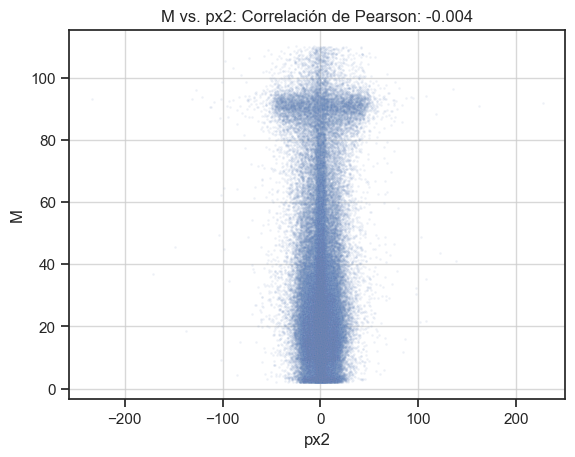

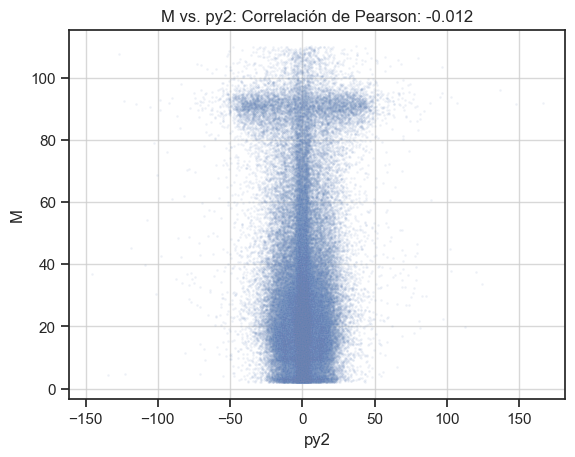

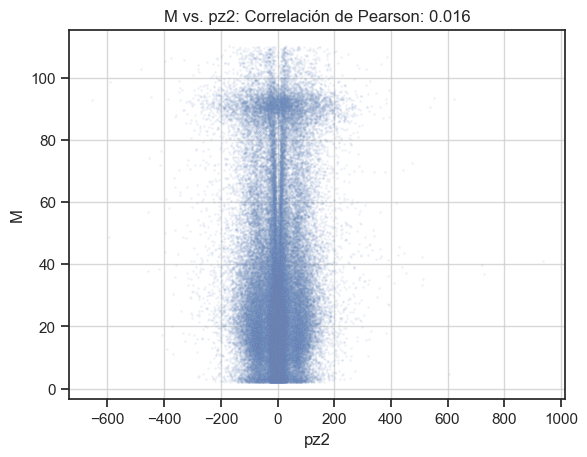

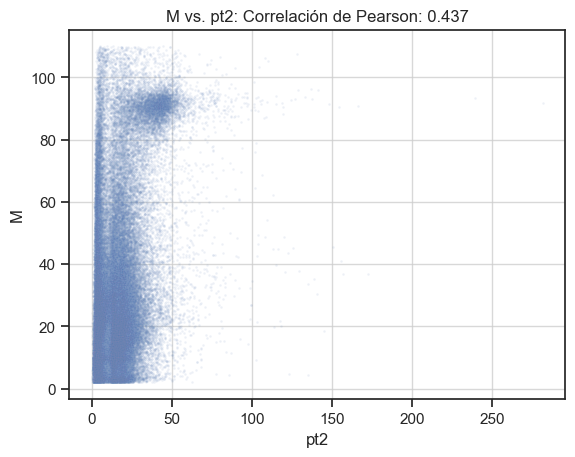

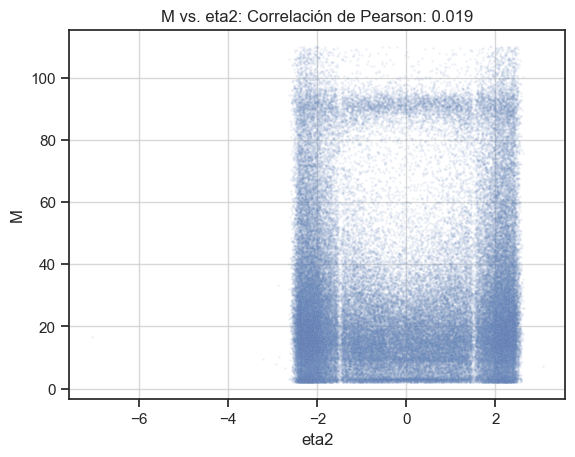

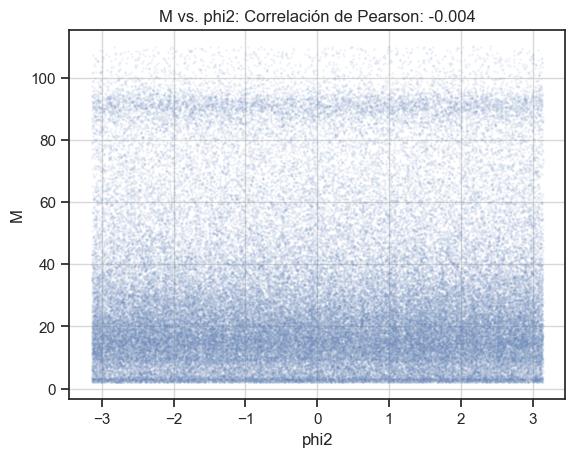

In [392]:
# Diagramas de dispersión (scatter plots) de características numéricas vs. la variable objetivo
for f in tqdm(numerical_features):
    corr_pearson = df[f].corr(df[target], method="pearson")  # Correlación de Pearson
    sns.scatterplot(x=f, y=target, data=df, s=3, alpha=0.1)  # Diagrama de dispersión
    plt.grid(alpha=0.75)  # Líneas de la cuadrícula
    plt.title(
        f"{target} vs. {f}: Correlación de Pearson: {corr_pearson.round(3)}"
    )  # Título
    plt.show()

-Caracteristicas categoricas vs. Target

  0%|          | 0/2 [00:00<?, ?it/s]

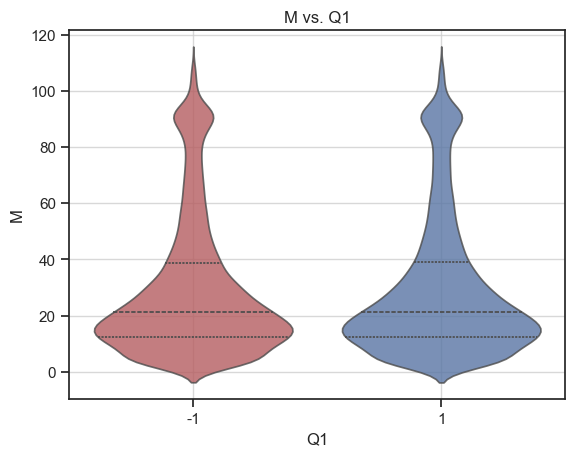

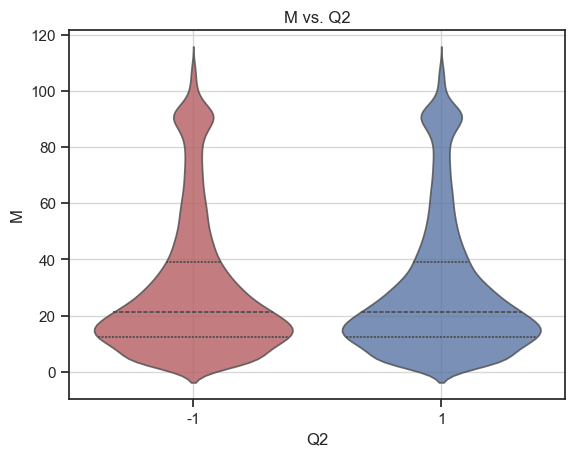

In [394]:
# Diagramas de violín (violin plots) de la variable objetivo vs. las cargas
for f in tqdm(categorical_features):
    sns.violinplot(
        x=f,
        y=target,
        data=df,
        hue=f,
        inner="quartile",
        legend=False,
        palette=["r", "b"],
        alpha=0.8,
    )
    plt.grid(alpha=0.75)  # Líneas de la cuadrícula
    plt.title(f"{target} vs. {f}")  # Título
    plt.show()

Construcción de la Pipeline

Nuestra Pipeline constará de cuatro unidades: Preprocesamiento, Ingeniería de Características, Escalado y el Modelo en sí.

La unidad de preprocesamiento incluirá los siguientes pasos: selección de características -> eliminación/imputación de valores atípicos.

La unidad de ingeniería de características realizará la creación de características para mejorar el rendimiento del modelo. Nuevamente, se podría hacer esta unidad más elaborada agregando pasos como selección de características, PCA o agrupamiento (clustering), pero por ahora excluiremos esos pasos.

La unidad de escalado se utilizará para estandarizar todos los datos numéricos antes de pasarlos al modelo.

Finalmente, la unidad del modelo simplemente contendrá el algoritmo de aprendizaje automático con el que realizaremos las predicciones (en nuestro caso, un regresor de gradiente aumentado). Este es casi siempre el componente más simple y final de una pipeline de aprendizaje automático.

Una vez que tengamos construida nuestra Pipeline, será fácil evaluar diferentes modelos utilizando validación cruzada y ajustar sus hiperparámetros, con la certeza añadida de que nuestros pasos de preprocesamiento e ingeniería de características se aplican tanto a los datos de entrenamiento como a los de validación/prueba.

In [397]:
X = df.drop(columns=[target])  # Características
y = df[target]  # Variable objetivo

In [399]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
)

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (69924, 18)
Forma de y_train: (69924,)
Forma de X_test: (29968, 18)
Forma de y_test: (29968,)


-Construcción de transformadores personalizados

In [402]:
class FeatureRemover(BaseEstimator, TransformerMixin):
    """
    - Transformador personalizado para eliminar características (features) que sigue la interfaz de Sklearn para ser usado en un Pipeline.
    - Ejemplo de una clase que hereda de BaseEstimator y TransformerMixin.
    - Por lo tanto, debemos implementar los métodos fit() y transform().
    - Nota: fit_transform() se hereda de TransformerMixin.
    """
    
    def __init__(self, feature_names: list):
        """Inicializa el transformador."""
        self.feature_names = feature_names

    def fit(self, X, y=None):
        """No realiza ninguna acción."""
        return self

    def transform(self, X):
        """Elimina las características del DataFrame."""
        return X.drop(columns=self.feature_names).round(3)

Este ultimo código define un transformador personalizado llamado FeatureRemover, que elimina las columnas especificadas de un DataFrame:

_init_(self, feature_names: list): El constructor recibe una lista de nombres de características que se desean eliminar.
fit(self, X, y=None): El método fit no realiza ninguna acción, ya que no es necesario ajustar ningún modelo. Simplemente retorna el objeto transformador.
transform(self, X): Este método elimina las columnas especificadas en feature_names del DataFrame X y devuelve el DataFrame resultante con las características eliminadas. Además, redondea los valores del DataFrame a 3 decimales.

In [405]:
class OutlierImputator(BaseEstimator, TransformerMixin):
    def __init__(self, n_neighbors=30, contamination=0.005, verbose=False):
        self.n_neighbors = n_neighbors  # Número de vecinos a considerar en el modelo LOF
        self.contamination = contamination  # Porcentaje de contaminantes (outliers)
        self.verbose = verbose  # Opción para mostrar información detallada durante el proceso

    def outliers_lof(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """Detecta los outliers utilizando el método Local Outlier Factor (LOF) y los reemplaza con la media de cada característica."""
        
        # Hacemos una copia para proteger los datos originales
        X = X.copy()

        # Instanciamos el modelo LOF
        lof = LocalOutlierFactor(
            n_neighbors=self.n_neighbors, contamination=self.contamination, n_jobs=-1
        )

        # Ajustamos el modelo y obtenemos las etiquetas predichas
        predictions = lof.fit_predict(X[numerical_features])

        # Obtenemos los índices de los outliers
        outliers = np.where(predictions == -1)[0]
        
        # Contamos el número de outliers
        num_outliers = len(outliers)

        # Reemplazamos los outliers con la media de cada característica
        for i in outliers:
            X.iloc[i][numerical_features] = X[numerical_features].mean()

        if self.verbose:
            print("-" * 50)
            print("Informe de Imputación de Outliers")
            print("-" * 50)
            print(f"Número de outliers: {num_outliers}")
            print(f"Porcentaje de outliers: {num_outliers / X.shape[0] * 100:.2f}%")
        
        return pd.DataFrame(X).round(3)

    def fit(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """No realiza ninguna acción."""
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """Transforma los datos aplicando y devolviendo el método outliers_lof()."""
        return self.outliers_lof(X)

Este código define un transformador personalizado llamado OutlierImputator que utiliza el método Local Outlier Factor (LOF) para detectar los outliers (valores atípicos) en los datos y reemplazarlos con la media de cada característica:

1. _init_(self, n_neighbors=30, contamination=0.005, verbose=False): El constructor recibe tres parámetros:
n_neighbors: El número de vecinos que se utilizarán para calcular la puntuación LOF.
contamination: El porcentaje de datos que se espera que sean outliers.
verbose: Un valor booleano para controlar si se debe mostrar un informe detallado.

2. outliers_lof(self, X: pd.DataFrame, y=None) -> pd.DataFrame: Este método utiliza el modelo LOF para detectar outliers y los reemplaza con la media de cada característica:
Hace una copia de los datos para evitar modificar los datos originales.
Ajusta el modelo LOF a los datos y obtiene las predicciones.
Identifica los outliers y los reemplaza con la media de cada característica.
Si verbose es True, imprime un informe detallado sobre el número y porcentaje de outliers.

3. fit(self, X: pd.DataFrame, y=None) -> pd.DataFrame: Este método no realiza ninguna acción, ya que el transformador no requiere un ajuste previo. Simplemente devuelve el objeto transformador.

4. transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame: Este método aplica el proceso de detección de outliers y reemplazo mediante el método outliers_lof y devuelve los datos transformados.
5. 
El objetivo es que este transformador pueda ser integrado en un pipeline de Scikit-learn para manejar outliers de manera automatizada.

In [408]:
class CreateFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """En este caso, el método fit no hace nada, pero debe ser implementado para ser utilizado en un pipeline."""
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """Crea nuevas características a partir de las existentes."""
        
        X = X.copy()  # Hacemos una copia para proteger los datos originales

        # Calculamos la energía total del sistema sumando las energías de E1 y E2
        X["total_energy"] = X["E1"] + X["E2"]

        # Calculamos el producto de las componentes de los momentos
        X["px12"] = X["px1"] * X["px2"]
        X["py12"] = X["py1"] * X["py2"]
        X["pz12"] = X["pz1"] * X["pz2"]

        # Calculamos el producto de los momentos transversales
        X["pt12"] = X["pt1"] * X["pt2"]

        # Calculamos el producto de las cargas
        X["Q12"] = X["Q1"] * X["Q2"]
        
        # Calculamos el producto de las pseudorapideces
        X["phi12"] = X["phi1"] * X["phi2"]
        X["eta12"] = X["eta1"] * X["eta2"]

        # Devolvemos el dataframe con las nuevas características
        return pd.DataFrame(X).round(3)


1. fit(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
Este método no realiza ninguna operación significativa en este caso. Se incluye porque es necesario implementarlo cuando se usa este transformador en un pipeline de Scikit-learn. Retorna el mismo objeto para cumplir con el flujo de trabajo de los pipelines.

2. transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
Este método es donde ocurre la creación de nuevas características a partir de las existentes en el conjunto de datos.


Nuestro transformador personalizado CreateFeatures crea las siguientes nuevas características:

Energía total: E1 + E2
Producto de las componentes de los momentos: px1 * px2, py1 * py2, pz1 * pz2
Producto de los momentos transversales: pt1 * pt2
Producto de las cargas: Q1 * Q2
Producto de las pseudorapideces: phi1 * phi2, eta1 * eta2
La motivación para crear estas características es la siguiente:

La energía total de un sistema es una cantidad conservada en física.
La energía cinética es proporcional al cuadrado del momento.
El producto de las cargas determina el tipo de interacción entre las partículas (atracción o repulsión).lsion).

In [412]:
def build_pipeline(model, with_feature_engineer=True) -> Pipeline:
    """Construye el pipeline final combinando el preprocesador, la ingeniería de características y el modelo especificado."""

    # Definiendo las nuevas características numéricas y categóricas (originales + características creadas por el transformador CreateFeatures)
    new_num_features = numerical_features + [
        "total_energy",
        "px12",
        "py12",
        "pz12",
        "pt12",
        "phi12",
        "eta12",
    ]
    new_cat_features = categorical_features + ["Q12"]
    
    # Paso 1: Preprocesamiento
    preprocessor = make_pipeline(
        FeatureRemover(feature_names=["Run", "Event"]), OutlierImputator()
    )

    # Paso 2: Ingeniería de características
    feature_engineer = make_pipeline(CreateFeatures())
    
    # Paso 3: Escalado (StandardScaler para características numéricas y passthrough para características categóricas)
    scaler = ColumnTransformer(
        [
            (
                "numerical",
                StandardScaler(),
                new_num_features if with_feature_engineer else numerical_features,
            ),
            (
                "categorical",
                "passthrough",
                new_cat_features if with_feature_engineer else categorical_features,
            ),
        ],
        verbose_feature_names_out=False,
    )
    
    # Devolver el pipeline completo
    return Pipeline(
        [
            ("preprocessor", preprocessor),
            (
                "feature_engineer",
                feature_engineer if with_feature_engineer else "passthrough",
            ),
            ("scaler", scaler),
            ("model", model),
        ]
    )

En este caso, el pipeline consta de los siguientes pasos:

1. Preprocesamiento: Se eliminan algunas características específicas y se imputan los valores atípicos.
2. Ingeniería de características: Si with_feature_engineer es verdadero, se agregarán nuevas características usando el transformador CreateFeatures.
3. Escalado: Se normalizan las características numéricas y las características categóricas se mantienen sin cambios (passthrough).
4. Modelo: Finalmente, el modelo se ajusta a los datos procesados.

 
Esta función devuelve un pipeline completo para el modelo.

# Selección de Modelo sin Ingeniería de Características

En esta sección, realizaremos una validación cruzada de varios modelos diferentes sin incluir el paso de ingeniería de características en nuestro pipeline.

En la siguiente sección, haremos lo mismo, pero con la unidad de ingeniería de características incluida.

La razón de esto es que queremos ver cuánto mejora (si es que mejora) el paso de ingeniería de características. Diferentes modelos pueden beneficiarse más o menos de la ingeniería de características, por lo que es importante comparar los modelos con y sin ingeniería de características antes de decidir cuál es el mejor modelo para continuar.with.

In [416]:
def realizar_validacion_cruzada(
    pipeline, X, y, k=5, scoring="neg_root_mean_squared_error", verbose=3
):
    """Realiza validación cruzada K-fold y retorna la puntuación promedio."""

    # Configura la estrategia de validación cruzada
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Realiza la validación cruzada
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring=scoring, verbose=verbose)

    # Toma el valor absoluto de las puntuaciones (ya que estamos usando una métrica de puntuación negativa)
    scores = abs(scores)
    mean = scores.mean()
    std = scores.std()
    print("-" * 50)
    print(f"Modelo: {pipeline['model']._class.name_}")
    print(f"RMSEs de la CV: {scores}")
    print(f"RMSE Promedio: {mean:.3f}")
    print(f"Desviación estándar del RMSE: {std:.3f}")
    print("-" * 50)

    return mean

Este ultimo código realiza una validación cruzada k-fold y devuelve el RMSE promedio del modelo a través de todas las particiones.

In [419]:
# Lista de modelos para probar
models = [
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42, verbose=0),
    CatBoostRegressor(random_state=42, verbose=False),
]

In [421]:
# Diccionario para almacenar las puntuaciones promedio de la validación cruzada
cv_scores = {}

# Iterando a través de los modelos y realizando la validación cruzada para cada uno, almacenando la puntuación promedio en el diccionario
for model in tqdm(models):
    pipeline = build_pipeline(model, with_feature_engineer=False)
    cv_score = perform_cross_val(pipeline, X_train.copy(), y_train.copy())
    cv_scores[model.__class__.__name__] = cv_score

  0%|          | 0/3 [00:00<?, ?it/s]

In [423]:
# Mejor modelo y su puntuación promedio de la validación cruzada
best_model = min(cv_scores, key=cv_scores.get)
best_score = cv_scores[best_model]

print("-" * 50)
print(f"Mejor modelo: {best_model}")
print(f"Mejor puntuación de la CV: {best_score:.3f}")
print("-" * 50)

--------------------------------------------------
Mejor modelo: LGBMRegressor
Mejor puntuación de la CV: 0.959
--------------------------------------------------


Este código realiza validación cruzada para cada uno de los modelos y selecciona el que tenga la mejor puntuación de RMSE promedio. El RMSE (Root Mean Squared Error) mide el error promedio de un modelo de regresión en la misma escala que la variable objetivo. En este caso, un RMSE de 0.959 significa que, en promedio, las predicciones del modelo tienen un error de aproximadamente 0.959 unidades respecto a los valores reales.

Podemos ver que el ganador es el LGBMRegressor. Pero, ¿seguirá siendo el mejor cuando activemos la ingeniería de características?


# Selección de Modelo con Ingeniería de Características

In [427]:
# Dictionary to store the mean CV scores
cv_scores_with_feature_engineer = {}

# Looping through the models and performing cross-validation for each model WITH feature engineering, storing the mean CV score in the dictionary
for model in tqdm(models):
    pipeline = build_pipeline(model, with_feature_engineer=True)
    cv_score = perform_cross_val(pipeline, X_train.copy(), y_train.copy())
    cv_scores_with_feature_engineer[model.__class__.__name__] = cv_score

  0%|          | 0/3 [00:00<?, ?it/s]

In [429]:
# Selección del mejor modelo y su puntuación media de la validación cruzada (CV)
best_model_with_feature_engineer = min(
    cv_scores_with_feature_engineer, key=cv_scores_with_feature_engineer.get
)
best_score_with_feature_engineer = cv_scores_with_feature_engineer[
    best_model_with_feature_engineer
]

# Imprimimos los resultados del mejor modelo con ingeniería de características
print("-" * 50)
print(f"Mejor modelo con Ingeniería de Características: {best_model_with_feature_engineer}")
print(f"Puntuación media de CV con Ingeniería de Características: {best_score_with_feature_engineer:.3f}")
print("-" * 50)

--------------------------------------------------
Mejor modelo con Ingeniería de Características: LGBMRegressor
Puntuación media de CV con Ingeniería de Características: 0.995
--------------------------------------------------


1. Diccionario de puntuaciones: Se crea un diccionario vacío cv_scores_with_feature_engineer para almacenar las puntuaciones de validación cruzada de los diferentes modelos, con la ingeniería de características activada.

2. Bucle de evaluación: Se recorre la lista de modelos (models), se crea un pipeline para cada modelo con la ingeniería de características activada, y luego se ejecuta la validación cruzada usando la función perform_cross_val. La puntuación media obtenida se guarda en el diccionario.

3. Selección del mejor modelo: Después de completar las evaluaciones, se selecciona el modelo con la mejor puntuación media de la validación cruzada. Esto se logra utilizando la función min para encontrar la clave del diccionario con el valor más bajo (ya que las puntuaciones son negativas para RMSE).

4. Impresión de resultados: Finalmente, se imprimen los resultados, mostrando el mejor modelo y su puntuación.
Este proceso nos permite comparar cómo se comportan los modelos con y sin la ingeniería de características y determinar si esta mejora el rendimiento.

Nuevamente LGBMRegressor gana. Es el mejor modelo tanto con como sin ingeniería de características.

Sin embargo, vemos que la puntuacion media aumenta. En la siguiente sección, veremos si podemos mejorar el rendimiento de nuestro modelo ajustando los hiperparámetros mediante una búsqueda aleatoria en la rejilla (randomized grid search).

In [441]:
# Creando un pipeline con el mejor modelo
model = LGBMRegressor(random_state=42, verbose=-1)  # Instanciamos el modelo LGBMRegressor
LGBMR_pipe = build_pipeline(model, with_feature_engineer=True)  # Creamos el pipeline, incluyendo ingeniería de características

# Ajuste de hiperparámetros

Nuestro modelo base con LGBMRegressor y sus hiperparámetros predeterminados (sin ajuste de hiperparámetros) tiene un CV RMSE de 0.995 GeV, lo cual no está nada mal. Veamos si podemos mejorarlo con el ajuste de hiperparámetros.

Se debe tener en cuenta que, para ahorrar tiempo de procesamiento y evitar problemas de memoria, entrenaremos el RandomizedSearchCV con solo una pequeña muestra del conjunto de entrenamiento (20%). Esto, a su vez, puede dar resultados peores que el modelo base (RMSE = 0.995 GeV), pero esto es solo porque el modelo está viendo menos datos durante el proceso de RandomizedSearch. Deberíamos ver la mejora cuando entrenemos el mejor modelo usando el conjunto de entrenamiento completo.

In [445]:
# Definiendo la rejilla de hiperparámetros
parmas = {
    "model__learning_rate": np.linspace(0.01, 0.3, 10),  # Tasa de aprendizaje
    "model__n_estimators": np.arange(500, 3000, 500),  # Número de árboles en el modelo
    "model__max_depth": np.arange(3, 11),  # Profundidad máxima del árbol
    "model__reg_lambda": np.logspace(-2, 1, 10),  # Regularización L2
    "model__subsample": np.linspace(0.6, 1, 5),  # Proporción de muestras usadas
    "model__colsample_bytree": np.linspace(0.6, 1, 5),  # Proporción de características usadas por árbol
    "model__min_child_samples": np.arange(5, 50, 5),  # Mínimo de muestras por hoja
    "model__boosting_type": ["gbdt", "dart"],  # Tipos de boosting
}

# Instanciando RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=LGBMR_pipe,  # El pipeline que contiene el modelo y la ingeniería de características
    param_distributions=parmas,  # Distribución de los hiperparámetros para la búsqueda aleatoria
    n_iter=10,  # Número de iteraciones a realizar
    cv=3,  # Número de particiones en la validación cruzada
    scoring="neg_root_mean_squared_error",  # Métrica de evaluación: error cuadrático medio negativo
    error_score="raise",  # Levantar error si ocurre un problema
    verbose=3,  # Nivel de verbosidad para mostrar información del progreso
    random_state=42,  # Para reproducibilidad
)


# Creando un conjunto de entrenamiento más pequeño para acelerar el proceso de búsqueda y evitar problemas de memoria
rs_X_train = X_train.sample(frac=0.2, random_state=42)  # Tomamos el 20% de los datos
rs_Y_train = y_train.sample(frac=0.2, random_state=42)

# Ajustando el modelo
random_search.fit(rs_X_train, rs_Y_train)

# Resultados
best_model = random_search.best_estimator_  # Mejor modelo encontrado
best_params = random_search.best_params_  # Mejor conjunto de hiperparámetros
best_score = random_search.best_score_  # Mejor puntuación obtenida

print("-" * 50)
print("Resultados de RandomizedSearchCV:")
print("-" * 50)
print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntuación: {best_score:.3f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END model__boosting_type=gbdt, model__colsample_bytree=0.6, model__learning_rate=0.20333333333333334, model__max_depth=9, model__min_child_samples=10, model__n_estimators=2500, model__reg_lambda=0.021544346900318832, model__subsample=0.9;, score=-2.339 total time=   7.3s
[CV 2/3] END model__boosting_type=gbdt, model__colsample_bytree=0.6, model__learning_rate=0.20333333333333334, model__max_depth=9, model__min_child_samples=10, model__n_estimators=2500, model__reg_lambda=0.021544346900318832, model__subsample=0.9;, score=-2.051 total time=   7.0s
[CV 3/3] END model__boosting_type=gbdt, model__colsample_bytree=0.6, model__learning_rate=0.20333333333333334, model__max_depth=9, model__min_child_samples=10, model__n_estimators=2500, model__reg_lambda=0.021544346900318832, model__subsample=0.9;, score=-2.461 total time=  10.0s
[CV 1/3] END model__boosting_type=gbdt, model__colsample_bytree=0.9, model__learning_rate=0.2355

In [447]:
# Realizando validación cruzada con el mejor modelo (con los mejores parámetros) sobre todo el conjunto de entrenamiento
perform_cross_val(best_model, X_train.copy(), y_train.copy())

0.9986164442084668

Probablemente podríamos mejorar aún más el rendimiento del modelo reduciendo el rango de los hiperparámetros y utilizando GridSearchCV, pero por ahora nos detendremos aquí.

# Evaluacion Final

In [460]:
def eval_model(pipeline, X_train, y_train, X_test, y_test):
    """
    Entrena rápidamente el pipeline del modelo y lo evalúa en los conjuntos de entrenamiento y prueba.
    """
    # Ajustar el pipeline
    pipeline.fit(X_train, y_train)

    # Predicciones
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Métricas
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)  # Error cuadrático medio (RMSE) en el conjunto de entrenamiento
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)  # Error cuadrático medio (RMSE) en el conjunto de prueba

    r2_train = r2_score(y_train, y_pred_train)  # R2 en el conjunto de entrenamiento
    r2_test = r2_score(y_test, y_pred_test)    # R2 en el conjunto de prueba

    print("-" * 50)
    print(f"Modelo de regresión: {pipeline['model'].__class__.__name__}")
    print(f"RMSE en entrenamiento: {rmse_train:.3f}")
    print(f"RMSE en prueba: {rmse_test:.3f}")
    print(f"R2 en entrenamiento: {r2_train:.3f}")
    print(f"R2 en prueba: {r2_test:.3f}")
    print("-" * 50)

    # Graficar las predicciones contra los valores reales
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred_test, s=3, alpha=0.5)

    # Graficar el puntaje R2
    x = np.linspace(0, 110, 100)
    sns.lineplot(x=x, y=(r2_test * x), color="r", label=f"Puntaje R2: {r2_test:.3f}")

    # Ajustes del gráfico
    plt.grid(alpha=0.75)
    plt.title("Predicciones vs. Valores Reales")
    plt.xlabel("Masa Invariante Real (GeV)")
    plt.ylabel("Masa Invariante Predicha (GeV)")
    plt.show()

C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--------------------------------------------------
Modelo de regresión: LGBMRegressor
RMSE en entrenamiento: 0.364
RMSE en prueba: 0.859
R2 en entrenamiento: 1.000
R2 en prueba: 0.999
--------------------------------------------------


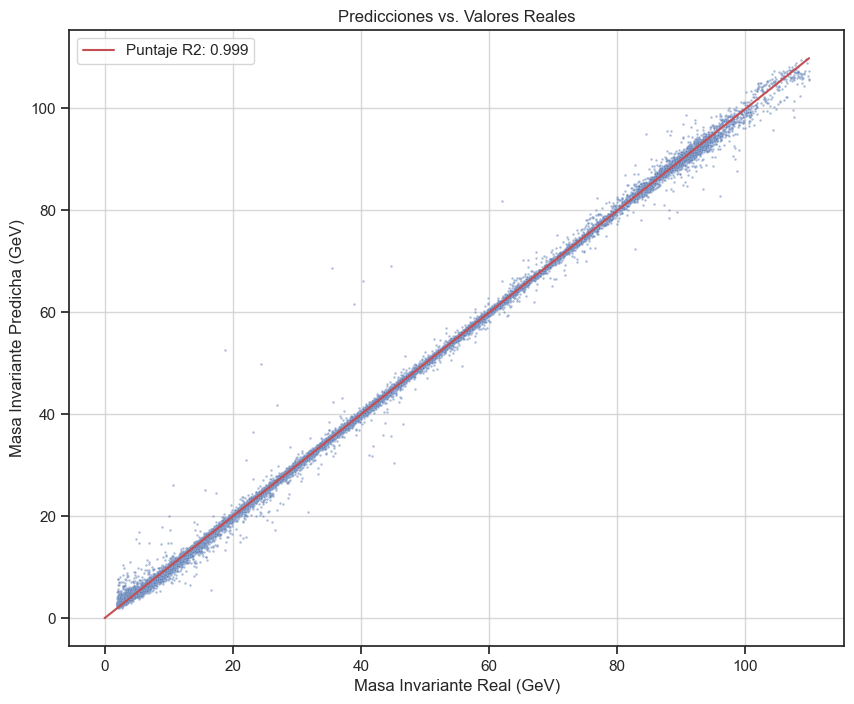

In [462]:
# Evaluando nuestro mejor modelo (con los mejores parámetros) en los conjuntos de entrenamiento y prueba
eval_model(best_model, X_train, y_train, X_test, y_test)

Nuestro modelo final tiene un RMSE en prueba de 0.859 GeV y un puntaje R2 en prueba de 0.999.

Guardemos el modelo (pipeline) para su uso futuro, por ejemplo, si queremos hacer predicciones con nuevos datos, como colisiones de protones en el LHC.

In [465]:
# Guardando el modelo
import joblib
# Se guarda el modelo entrenado (pipeline) en un archivo con formato .pkl
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

# Importancia de las caracteristicas

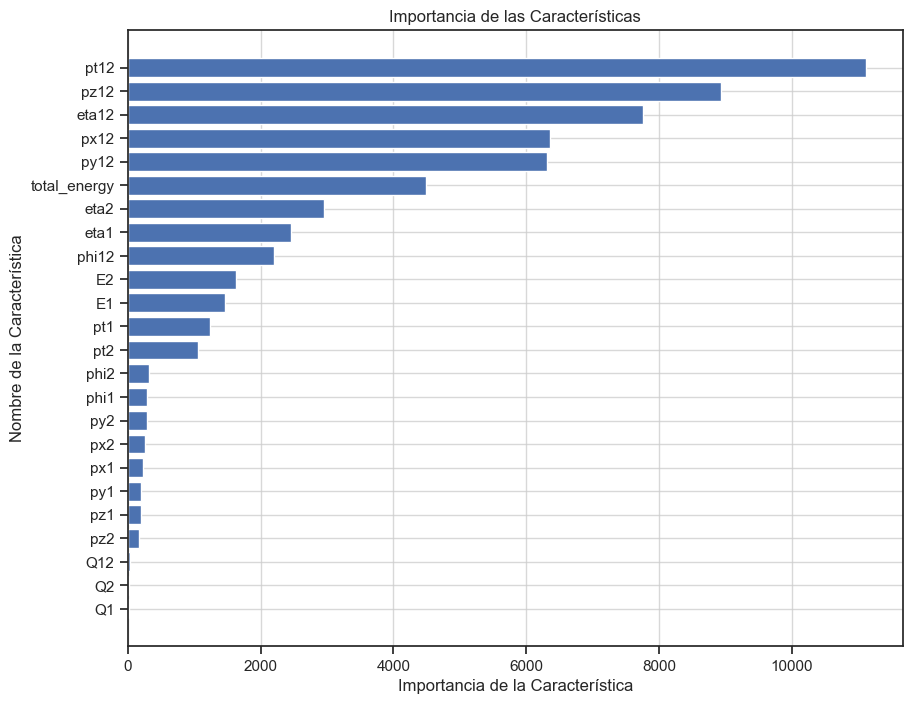

In [468]:
# Obteniendo las importancias de las características
importances = best_model.named_steps["model"].feature_importances_

# Obteniendo los nombres de las características
feature_names = best_model.named_steps["model"].feature_name_

# Creando una serie para almacenar las importancias de las características con los nombres de las características como índice
feature_importances = pd.Series(importances, index=feature_names).sort_values()

# Graficando las importancias de las características
plt.figure(figsize=(10, 8))
plt.barh(feature_importances.index, feature_importances.values)
plt.title("Importancia de las Características")
plt.xlabel("Importancia de la Característica")
plt.ylabel("Nombre de la Característica")
plt.grid(alpha=0.75)
plt.show()


Físicamente, tiene sentido que 'pz12' sea la característica más importante. Los haces de partículas utilizados para crear los pares de dielectrones viajan a lo largo del eje z, y dado que la masa invariante es proporcional al cuadrado del momento, la componente z del momento p1p2 debería ser la característica más importante para predecir la masa invariante.